<a href="https://colab.research.google.com/github/JulietaSerrano98/miPortfolio/blob/main/Proyecto_Julieta_Serrano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Abstract - Storytelling for Business**

#### **¿Qué es lo que se busca hacer con el proyecto?**
##### Mi proyecto busca analizar los datos historicos de ventas online de una empresa vinculada con el bienestar, salud, y cuidado personal del cliente, buscando generar modelos que me permitan determinar los comportamientos que adoptan los compradores cada que pasan por el sitio.
---
#### **¿Para que se seleccionó considerando todo el universo de industrias existentes?**
##### La elección de está temática viene dada por la imperiosa curiosidad que me genera el poder entender a los clientes en un sentido mucho más holístico sin dejar de lado ningún tipo de aspecto que pueda repercutir en su journey, todo esto con la intención de iterar a partir de lo existente con el objetivo de mejorar su experiencia de compra.
---
#### **¿Por qué? ¿Cúal es el objetivo por el cuál resultaría importante embarcarse en un proyecto de tal envergadura?**
##### Los beneficios que podría traer la elaboración de este modelo serán de gran valor agregado para todas aquellas áreas de negocio cuyas tareas tengan relación con la búsqueda de un desarrollo óptimo y eficaz de los objetivos atribuidos para cada trimestre.


##### **Preguntas y objetivos de la investigación:**
##### *) ¿Es posible predecir la tendencia de ventas en función de la data histórica existente como para tener proyeccciones más acertadas?
##### *) ¿Cómo afectan las promociones vigentes dentro de la mente del consumidor? ¿Son un call to action efectivo o deberían planificarse de otra forma?
##### *) ¿Es posible crear perfiles de cliente con los cuáles estandarizar los patrones de compra?
##### *) Mi objetivo con este proyecto se basa en tratar de desarrollar un modelo que pueda responder a estos interrogantes


### **Dataset seleccionado**
##### Para la realización del proyecto tomaré en cuenta el dataset que utilicé durante la cursada de Data Analyst. No es que no quiera utilizar otras fuentes de datos, pero siento que puedo sacarle mejor provecho entendiendo los objetivos y metas que tengo definidos.
##### El dataset corresponde a las ventas de una tienda, considerando diferentes elementos como los productos a seleccionar, el tipo de pedido realizado, los descuentos y cupones adjuntos, el canal por el cuál ingresó el cliente, el destino del pedido, etc.


### **Contexto Comercial**
##### En el mundo del retail, como ocurre con el resto de los modelos de negocios que tienen una metodología B2C, existen diferentes tipos de clientes con que lidiar, dónde cada uno tiene sus atributos especifícos que los hacen únicos, pero a su vez clusterizables al tener patrones de consumo los cuales, al tener una fuerte relación entre sí, son fácilmente atribuibles a una categoría de cliente específica, resultando así en la obtención de perfiles con los cuales se puede moldear las estrategias de comercialización a medida de las tendencias a las que apunta el mercado.
##### En síntesis, se puede decir que los clientes a nivel micro pueden verse únicos, pero sus comportamientos no dejan de ser machearbles entre sí en un perfil unificado del cual se sienta representado.


### **Contexto Analítico**
##### El departamento de IT nos provee el acceso a las bases de datos dónde mediante consultas en SQL se pueden extraer los datos referidos a las ventas durante toda la historia de la compañía. Para sintetizar los análisis se efectúan bajadas cada cierre de mes para tenerlas consolidadas y almacenadas en una carpeta compartida con la cúal puedan trabajar el resto de las áreas.
##### A los clientes los podemos segmentar en dos tipos:
##### *) Suscriptos al programa de beneficios
##### *) Pertenecientes a la base general




### **Problema Comercial**
##### El director del área de comercial no consigue entender cómo es que debería distribuir los recursos de su presupuesto para que tengan una efectividad mayor de la que actualmente está teniendo en el armado y ejecución de propuestas comerciales para los clientes, más que nada en los periodos donde las ventas alcanzan su punto más bajo, que es a principio y finales del mes. Realmente agradecería si se pudiera predecir el comportamiento de los mismos para apalancarse en acciones con una base empiríca. El conjunto de datos consta de las ventas efectuadas por una cantidad de clientes que tienen adicionados features como el día de la compra, el monto gastado, cantidad de productos obtenidos, planes de financiamiento seleccionados, tipo de envío, entre otras variables.


##### *) Identificar comportamientos y características de las personas que efectuan compras en el sitio.
##### *) Generar un modelo que permita predecir cuáles son las acciones que podrían efectuarse para encauzar las compras de los clientes.
##### *) Proponer acciones a corto y largo plazo que permitan generar triggers de mayor impacto según la información obtenida.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Julieta Serrano/Data Science'

/content/drive/MyDrive/Julieta Serrano/Data Science


In [ ]:
%ls

 Base_CH.csv                    ProyectoCH_Julieta_Serrano.ipynb
 Base_Ventas.xlsx               Proyecto_Julieta_Serrano.ipynb
'Dataset Vtas Ecommerce.xlsx'


### **Lectura del Archivo**
##### Se optó por abrir el archivo en formato .xlsx

In [ ]:
df_vtas = pd.read_excel(r'Dataset Vtas Ecommerce.xlsx')

In [ ]:
df_vtas.head(1)

,fecha,fecha corta,Día,Hora,num Semana,pedido,email,estado,Localidad,Departamento,...,pago_tarjeta,Cuotas,Precio ítem,Cantidad,Suscripcion,Nom_Desc_1,Descuento_1,Nom_Desc_2,Descuento_2,Vta por unidades
0,2022-01-01 0:04:30,2022-01-01,1,0,1,z5593020com05,erovieden@hotmail.com,handling,CABA,dermocosmetica,...,Maestro,1,2076.8,1,1,EXO_20off_INDIVIDUAL_8,-519.2,NaN,0.0,2076.8


### **Analisis Exploratorio de Datos**
##### Se ejecutaron una serie de metodos con los cuales entender a nivel macro como es la data que integra el Dataset. Está más que claro que el .describe() está haciendo una clasificación erronea de algunos campos siendo que los considera como números y los calcula como tal, aunque esto a futuro en la realización de modelos de ML puede ser perjudicial al generar sesgos. Luego, desde el punto de vista del datatype, habría que corregirlos para que estén alineados con el campo al cual hacen referencia. Para los campos nulos, lo ideal sería que los reemplace con un valor que no afecte la performance del tablero.

In [ ]:
df_vtas.describe()

,Día,Hora,num Semana,Importe,SKU,Cuotas,Precio ítem,Cantidad,Suscripcion,Descuento_1,Descuento_2,Vta por unidades
count,161131.000000,161131.000000,161131.000000,161131.000000,161131.000000,161131.000000,161131.000000,161131.000000,161131.000000,161131.000000,161131.000000,161131.000000
mean,15.621190,14.445910,3.536899,5098.069067,180170.437600,2.447599,748.263592,1.333586,0.744593,-271.236978,-4.459016,884.490677
std,7.983016,6.018024,1.170648,4964.381554,46953.378652,1.819320,1166.143639,1.196575,0.436091,592.710338,41.248441,1406.996608
min,1.000000,0.000000,1.000000,365.000000,619.000000,1.000000,0.000000,1.000000,0.000000,-23380.000000,-3869.910000,0.000000
25%,10.000000,11.000000,3.000000,2268.420000,151970.000000,1.000000,170.000000,1.000000,0.000000,-354.000000,0.000000,200.000000
50%,14.000000,15.000000,3.000000,3888.000000,205400.000000,1.000000,407.500000,1.000000,1.000000,-107.850000,0.000000,470.000000
75%,22.000000,19.000000,4.000000,6168.950000,217700.000000,4.000000,951.440000,1.000000,1.000000,0.000000,0.000000,1077.600000
max,31.000000,23.000000,6.000000,99052.450000,225850.000000,6.000000,52919.500000,40.000000,1.000000,0.040000,0.090000,52919.500000


In [ ]:
df_vtas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161131 entries, 0 to 161130
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fecha             161131 non-null  object 
 1   fecha corta       161131 non-null  object 
 2   Día               161131 non-null  int64  
 3   Hora              161131 non-null  int64  
 4   num Semana        161131 non-null  int64  
 5   pedido            161131 non-null  object 
 6   email             161131 non-null  object 
 7   estado            161131 non-null  object 
 8   Localidad         161131 non-null  object 
 9   Departamento      161131 non-null  object 
 10  Categoria         160137 non-null  object 
 11  Importe           161131 non-null  float64
 12  SKU               161131 non-null  int64  
 13  producto          161131 non-null  object 
 14  Marca             161131 non-null  object 
 15  Marca Propia      161131 non-null  object 
 16  pago_forma        16

In [ ]:
df_vtas['Localidad'].values

array(['CABA', 'CABA', 'CABA', ..., 'CABA', 'CABA', 'INTERIOR'],
      dtype=object)

In [ ]:
df_vtas.isna()

,fecha,fecha corta,Día,Hora,num Semana,pedido,email,estado,Localidad,Departamento,...,pago_tarjeta,Cuotas,Precio ítem,Cantidad,Suscripcion,Nom_Desc_1,Descuento_1,Nom_Desc_2,Descuento_2,Vta por unidades
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161126,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
161127,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
161128,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
161129,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


##### A continuación, se procederá a realizar una serie experimentos con diversas librerías a fin de encontrar patrones con los cuales entender mejor el comportamiento de compra de los clientes

##PCA
#### Lo utilicé a modo de prueba para ver como se comportaba con las variables vinculadas con el monto vendido y la cantidad en función del día y si el cliente se encuentra suscrito al programa de fidelización o no

In [ ]:
df_vtas_filtered = df_vtas.groupby(["Día", "Suscripcion"]).agg({"Vta por unidades":"sum","Cantidad":"sum"})
df_vtas_filtered.head(1)

,,Vta por unidades,Cantidad
Día,Suscripcion,,
1,0,363783.26,369


In [ ]:
#  df_vtas_filtered = df_vtas[["columna1", "columna2"]]

In [ ]:
# Filtrar solo las columnas numéricas en el DataFrame de ventas
df_vtas_numeric = df_vtas_filtered.select_dtypes(include=[np.number])

In [ ]:
# Imputar los valores faltantes con la media o la mediana
imputer = SimpleImputer(strategy='mean')
df_vtas_imputed = pd.DataFrame(imputer.fit_transform(df_vtas_numeric), columns=df_vtas_numeric.columns)

In [ ]:
# Estandarizar los datos numéricos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_vtas_imputed)

In [ ]:
# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

In [ ]:
# Crear un DataFrame con las nuevas columnas reducidas por PCA
reduced_df = pd.DataFrame(data=X_reduced, columns=['PCA1', 'PCA2'])

In [ ]:
reduced_df

,PCA1,PCA2
0,-1.875214,0.163286
1,-1.726504,0.135638
2,-1.572899,0.044500
3,-1.155651,0.018634
4,-1.159986,-0.012411
...,...,...
57,-0.756074,0.030891
58,-1.403776,0.013024
59,-0.624887,0.027954
60,-0.699546,-0.057699


## mlxtend
##### En la cursada me pareció muy interesante uno de los temas que fue el de reglas de asociación. Como no lo vimos en profundidad más haya de su concepto teórico, me puse a investigar y encontré está librería la cual me podría facilitar la búsqueda de categorías de las cuales los clientes podrían tener un gran nivel de afinidad en función del histórico de ventas

In [ ]:
pip install mlxtend

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
#Agrupamos los departamentos que están registrados por cada orden
transaction_data = df_vtas.groupby(['pedido'])['Departamento'].apply(list)  #SKU,producto,Marca

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#transaction_data_onehot_test = pd.get_dummies(transaction_data.apply(pd.Series).stack()).sum(level=0)
transaction_data_onehot = pd.get_dummies(transaction_data.apply(pd.Series).stack()).max(level=0) #Usamos Hot Encoding para operar con var categoricas
transaction_data_onehot[transaction_data_onehot > 1] = 1
frequent_itemsets = apriori(transaction_data_onehot, min_support=0.05, use_colnames=True) #Usamos apriori para encontrar reglas de asociación
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1) # Ajustable según nivel de granularidad que quiera alcanzarse

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-109-0fb8cbe3ac35>:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  transaction_data_onehot = pd.get_dummies(transaction_data.apply(pd.Series).stack()).max(level=0)


In [ ]:
min_confidence = 0.6   #Ajustable según nivel de granularidad que quiera alcanzarse
significant_rules = rules[rules['confidence'] >= min_confidence]

significant_rules = significant_rules.sort_values(by=['lift'], ascending=False) #Sort descendiente en fción del lift

print(significant_rules)

                   antecedents         consequents  antecedent support  \
4                      (hogar)  (cuidado-personal)             0.08288   
11  (cuidado-de-la-piel, pelo)  (cuidado-personal)             0.10833   

    consequent support   support  confidence      lift  leverage  conviction  \
4             0.338054  0.057222    0.690416  2.042325  0.029204    2.138180   
11            0.338054  0.068092    0.628558  1.859341  0.031470    1.782096   

    zhangs_metric  
4        0.556484  
11       0.518325  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
transaction_data_onehot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,accesorios,accesorios-de-maquillaje,accesorios-de-pelo,acondicionadores-enjuagues-y-balsamos,adultos,alimentos,almohadillas-termicas,aromaterapia,aspirador-nasal,audio,...,solar,soluciones-basicas,suplementos-deportivos,suplementos-dietarios,suplementos-nutricionales,tensiometros,termometros,test,unas,viajes
pedido,,,,,,,,,,,,,,,,,,,,,
z5593020com05,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
z5593052com05,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
z5593064com05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
z5593097com05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
z5593101com05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
z5771731com05,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
z5771733com05,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
z5771739com05,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
transaction_data_onehot_test

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,accesorios,accesorios-de-maquillaje,accesorios-de-pelo,acondicionadores-enjuagues-y-balsamos,adultos,alimentos,almohadillas-termicas,aromaterapia,aspirador-nasal,audio,...,solar,soluciones-basicas,suplementos-deportivos,suplementos-dietarios,suplementos-nutricionales,tensiometros,termometros,test,unas,viajes
pedido,,,,,,,,,,,,,,,,,,,,,
z5593020com05,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
z5593052com05,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
z5593064com05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
z5593097com05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
z5593101com05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
z5771731com05,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
z5771733com05,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
z5771739com05,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


##### A continuación, se procederá a realizar un mapeo mediante diversos gráficos que intentan explicar mediante un análisis univariado diferentes cortes vinculados con la información de venta a lo largo del periodo de estudio. Mediante los mismos podremos obtener insights de valor que nos podrían ayudar a encontrar elementos con los cuáles encarar la investigación.

##**Matplotlib**

###Venta diaria
###### La intención de está vista será para tener una noción a nivel macro de como se distribuyen las ventas a lo largo del periodo en el que está inmerso el dataframe seleccionado. La detección de valles o puntas será vital para comprender aquellos días en los que podríamos prestar mayor atención en pos de comprender el porque de estas conductas.


In [ ]:
#df_vtas['Creation Date'] = pd.to_datetime[df_vtas['Creation Date']]

In [ ]:
#X = df_vtas["Día"].unique()
#dataframe_filtrado = df_vtas["Día"].drop_duplicates()

Base_dias_unicos = df_vtas.filter(['Día','Vta por unidades'], axis=1)
Base_dias_unicos_ = Base_dias_unicos. groupby("Día").agg({"Vta por unidades":"sum"})
#Base_dias_unicos_.set_index('Día',inplace=True)
X = Base_dias_unicos_.index
X

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='Día')

In [ ]:
#Y = df_vtas. groupby("Día").agg({"SKU Total Price":"sum"})
Y = Base_dias_unicos_.sum(axis=1)
Y

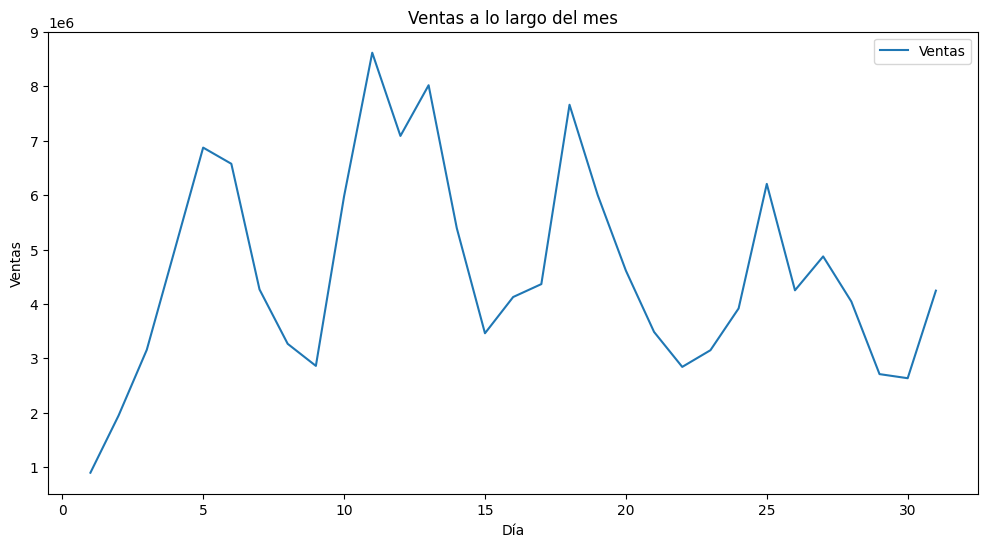

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(X, Y, label='Ventas')
ax.set_xlabel('Día')
ax.set_ylabel('Ventas')
ax.set_title('Ventas a lo largo del mes')
ax.legend()

Insights: Se detecta que un patrón a lo largo del mes el cual indica que los días de mayor venta (mostrandose con picos) corresponden a los de la semana, mientras los fines de semana hay menor interés en efectuar compras.

Como hipótesis podríamos plantearnos:
> H0: Los fines de semana son momentos en dónde los clientes prefieren hacer otros queaseres o actividades a tener que sumunistrarse con insumos del hogar.

> H1: Los fines de semana no hay una gran cantidad de promociones que incentiven al cliente a comprar.

###Ventas semanales
###### La intención de está vista tiene por objetivo análizar como se descompone la venta a lo largo de las semanas que integran el mes de análisis, pudiendo tener una perspectiva de cuáles son las semanas cuyo tráfico de ventas resulta alto, y cuáles otras probablemente tengan una tendencia a la baja y deban ser estudiadas en detalle para ver como corregir.

In [ ]:
##df_filtrado = df_vtas["Número de semana"].drop_duplicates()

In [ ]:
Base_dias_semana_unicos = df_vtas.groupby("num Semana").agg({"Vta por unidades":"sum"}).reset_index()
Base_dias_semana_unicos

,num Semana,Vta por unidades
0,1,894962.36
1,2,31094887.25
2,3,41417768.46
3,4,33091138.17
4,5,29143969.11
5,6,6876141.85


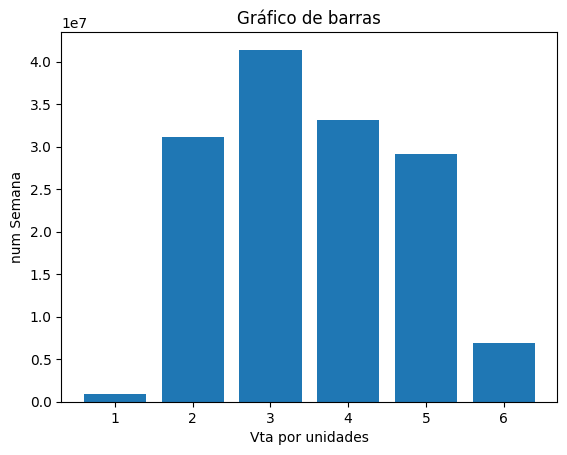

In [ ]:
plt.bar(Base_dias_semana_unicos["num Semana"], Base_dias_semana_unicos["Vta por unidades"])
plt.xlabel("Vta por unidades")
plt.ylabel("num Semana")
plt.title("Ventas semanales")
plt.show()

Insights: Debido a que el mes de estudio es enero, es evidente que durante la primera semana post año nuevo las ventas no serán las mismas que durante el resto del mes. Luego se nota una caida en el último mes que puede deberse a que los clientes están "cortos de plata" y llegan a fin de mes con lo justo sin darse gastos en cosas que podrían aplazarse para luego de la fecha de cobro.

Como hipótesis podríamos plantearnos:
> H0: Los clientes compran en las semanas 2, 3, 4 y 5 con mayor frecuencia debido a que se ofrecen mayores promociones, campañas o eventos de incentivo que sirvan como disparador para el cliente

> H1: Los clientes no realizaron compras en las fechas limitantes del mes debido a que pasaban por otras situaciones que superaban sus ganas o tiempo por efectuar una compra.

###Planes de cuotas con más ventas
###### Si bien no se suele recomendar el uso de gráficos de torta en los análisis de data, esté resulta óptimo dado que se trata una segmentación en función de una variable categórica que contiene 6 tipos de variantes. Por lo tanto, podría considerarse óptima para tener una aproximación sobre el share de cada una da las categorías presentadas en el Dataset obteniendo la tendencia que optan los consumidores al efectuar compras en el sitio web

In [ ]:
Base_pagos_unicos = df_vtas.groupby("Cuotas").agg({"Vta por unidades":"sum"}).reset_index()
Base_pagos_unicos

,Cuotas,Vta por unidades
0,1,71952615.76
1,2,14818181.47
2,3,13940389.32
3,4,12547879.09
4,5,8838351.42
5,6,20421450.14


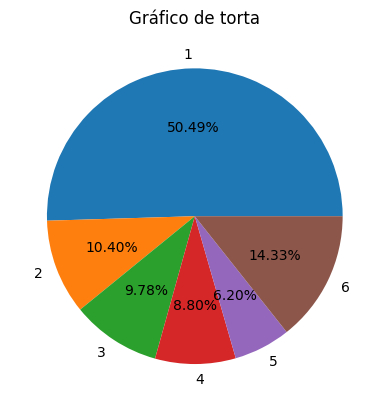

In [ ]:
plt.pie(Base_pagos_unicos['Vta por unidades'], labels=Base_pagos_unicos['Cuotas'], autopct='%1.2f%%')
plt.title('Share por Nro de Cuotas')
plt.show()

Insights: Sorprendentemente los clientes la mayor venta se debe a compras realizadas por débito, seguido de la de 6,2 y 3. Esto puede deberse a que los clientes prefieren tener un mejor control de los gastos que realizan. Otro factor puede deberse a que se prefiere pagar sin intereses a tenerlos en el resumen de sus compras. Después de todo, se intenta de ir hacía el mejor forma de ahorro posible.

Como hipótesis podríamos plantearnos:
> H0: La baja cantidad de cuotas elegidas NO es proporcional con el rechazo por aceptar pagos con interés o recargos asociados
> H1: La baja cantidad de cuotas elegidas es proporcional con el rechazo por aceptar pagos con interés o recargos asociados

##**Seaborn**

###Tipo de pago aperturado por la cantidad de cuotas
###### Con está vista podremos tener un corte en función de la distribución de cada uno de los tipos de cuotas existentes dentro de la tarjeta de crédito (siendo que la de débito únicamente posee una alternativa al ser su carácteristica por default el permitirte realizar pagos en una única cuota)

<Axes: xlabel='pago_forma', ylabel='Count'>

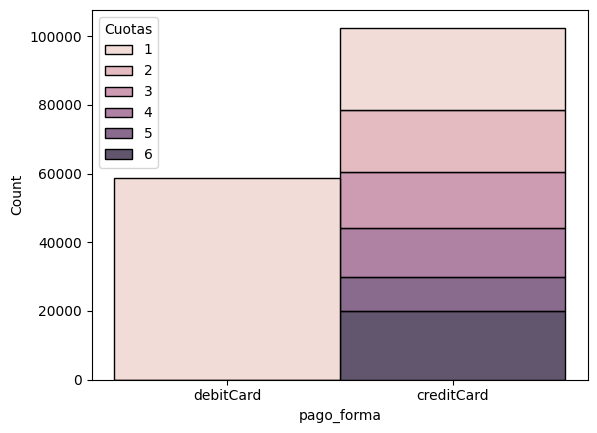

In [ ]:
sns.histplot(data=df_vtas, x="pago_forma", hue="Cuotas", multiple="stack")

Insights: Si sumamos la cantidad de personas que utilizan debito y credito en una cuota veremos que casi iguala a lo acumulado de las cuotas 2,3,4,5 y 6.
Como se mencionó en las conclusiones del gráfico anterior, esto puede deberse a las contras que puede traer extender el plazo de pago, ya sea por cuestiones administrativas o financieras.

Como hipótesis podríamos plantearnos:
> H0: La baja cantidad de cuotas elegidas NO es proporcional con el rechazo por aceptar pagos con interés o recargos asociados
> H1: La baja cantidad de cuotas elegidas es proporcional con el rechazo por aceptar pagos con interés o recargos asociados

###Gráfico lineal que indicará las ventas en función de la hora (falló)

In [ ]:
Base_horarios_unicos = df_vtas.groupby(["email","Hora"]).agg({"Vta por unidades":"sum"}).reset_index()
Base_horarios_unicos

,email,Hora,Vta por unidades
0,-.dsmusus@hotmail.com,20,1080.00
1,-0412acam@hotmail.com,19,4620.35
2,-0506afab@hotmail.com,9,14390.10
3,-0718afan@hotmail.com,18,10012.76
4,-1301asas@hotmail.com,12,2324.25
...,...,...,...
36980,zzutoamar@gmail.com,11,1091.78
36981,zzutonana@hotmail.com,12,956.92
36982,zzz00oroc@gmail.com,20,1892.00
36983,zzz91amar@gmail.com,18,4410.95


In [ ]:
#ventas_dom = Base_horarios_unicos[Base_horarios_unicos["dia semana 2"]=="Dom"]

In [ ]:
##sns.lineplot(data=Base_horarios_unicos,X="hora",y="SKU Total Price") --> esté gráfico lineal falló y no tengo idea el porqué

###Tendencia de ventas en función del horario
###### Está visualización nos dará acceso a la visión de las ventas en el hora a hora, teniendo una noción con la cuál entenderemos cuales suelen ser los horarios mayor frecuentados en la tienda.

<Axes: xlabel='Hora', ylabel='Vta por unidades'>

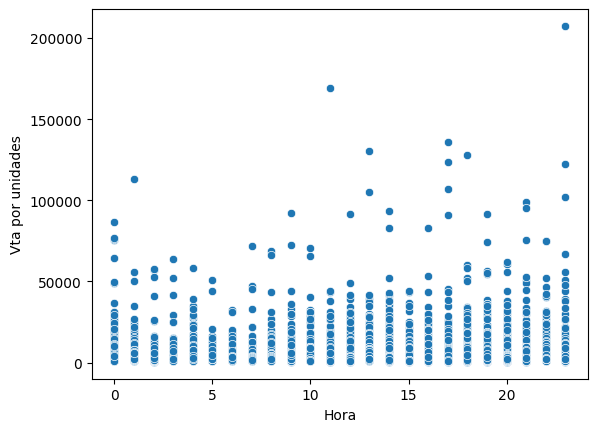

In [ ]:
sns.scatterplot(data=Base_horarios_unicos,  x="Hora", y="Vta por unidades")

Insights: Se destaca que la mayoría de las ventas no superan en promedio los 5.000 pesos.
Las horas con más ventas son las de tarde noche.
Aquellas compras que puedan tener un valor muy superior al promedio, puede que se traten de transacciones efectuadas al por mayor, un error del cliente al realizar su compra, o, en última instancia, podrían ser transacciones fraudulentas.
Ahora bien, si nos enfocamos en ver las compras que rondan entre los 5000 y 10000 pesos, estás podrían deberse a que, o el cliente se vio tentado ante los descuentos prometedores, o adquirió productos que pueden ser un poco más costosos que el promedio (articulos de electro o perfumería)

Lo que llama la atención es que hay mucha concentración de pedidos con compras inferiores a los 3000 pesos, siendo que los envíos gratis se adjudican a compras mayores a ese importe.

Como hipótesis podríamos plantearnos:
> H0: Los clientes no accedieron al envío gratis porque no prestaron atención a los términos y condiciones de envíos

> H1: Los clientes no accedieron al envío gratis porque lo consideraron económico de pagar

###Usabilidad de los transportistas a lo largo de las semanas
###### Con está vista podremos tener un corte en función de la locación de los clientes que efectuan sus pedidos en el sitio, entendiendo cuales son los puntos más calientes de los que podemos esperar una mejor recepción y en consecuente una cantidad de ventas destacable de la cuál podríamos hacer foco si nuestro objetivo es continuar aumentando en ventas. Caso contrario, podríamos reclinarnos en aquellas zonas con menor recepción para la implementación y ejecución de campañas de awareness.

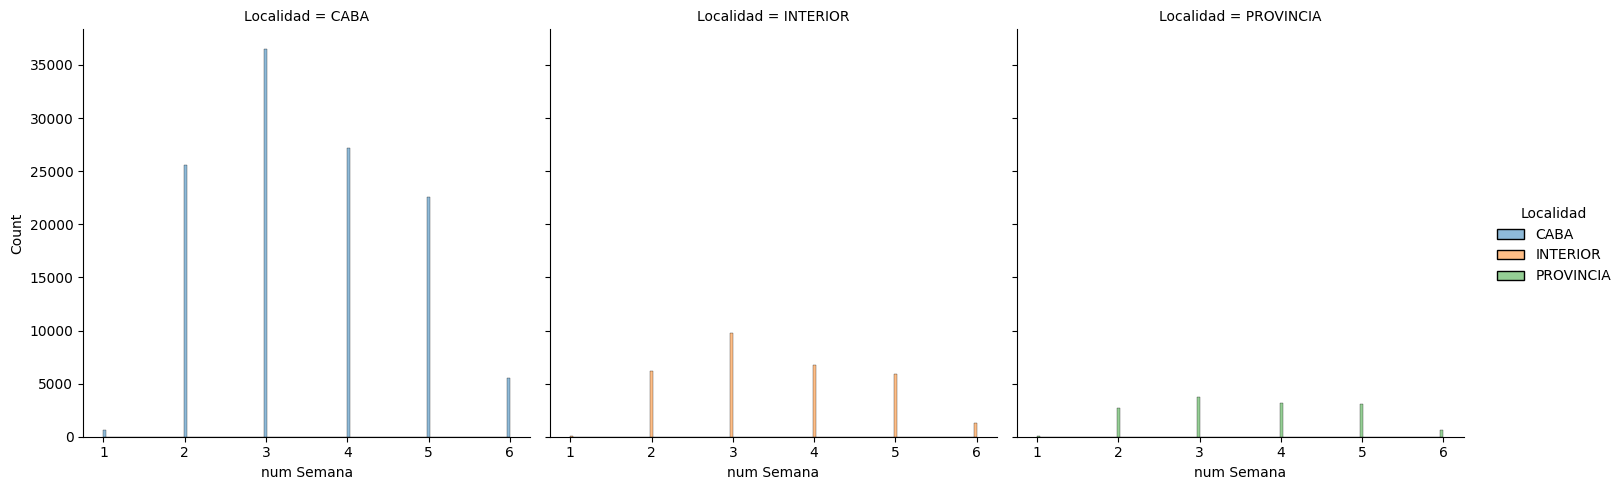

In [ ]:
sns.displot(data=df_vtas, x="num Semana", hue="Localidad", col="Localidad")

Insights: Podemos identificar cuales son aquellas localidades que tienen una mayor presencia a lo largo del mes. Aún así, es claro que todas han tenido una distribución similar, siendo que en las primeras semanas del mes tuvieron más presencia que llegando al final del mismo, tal como se vio con las compras que se realizaron a lo largo del mes.

Como hipótesis podríamos plantearnos:
> H0: Las personas que viven en CABA tienen un mayor conocimiento y fidelidad sobre la marca que ha ido construyendo a lo largo de los años.

> H1: La gran presencia de la marca en la zona genera una mayor visibilidad por sobre otras regiones donde no tiene tanta difusión.

Sea cual fuere la hipótesis, puede que acá no se estén generando los incentivos necesarios para verse mejor posicionados ante la competencia
